# Въведение в Машинното самообучение (Machine Learning)

Целите днес:

* Да се запознаем с курса  
* Да си подкараме необходимите технологии 
* Да разгледаме примерни входни данни
* Видове машинно самообучение: "с учител" (supervised) и "без учител" (unsupervised)
* Да разгледаме няколко алгоритъма най-общо

# Нужните технологии

Трябват ви jupyter, scikit-learn и няколко други технологии. Имате два начина да ги подкарате:

* `pip install`
* Anaconda (https://anaconda.org/)

Нека първо проверим версията на Python (трябва ни 3.11.x)

In [4]:
!python --version

Python 3.11.9


# `pip install`

За да начало са ни нужни следните библиотеки:

```
pip install numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn jupyter
```

In [1]:
pip install numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn jupyter

  Using cached mglearn-0.2.0-py2.py3-none-any.whl.metadata (628 bytes)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached mglearn-0.2.0-py2.py3-none-any.whl (581 kB)
   ---------------------------------------- 0.0/315.8 kB ? eta -:--:--
   ---------------------------------------- 315.8/315.8 kB 9.9 MB/s eta 0:00:00
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)
   ---------------------------------------- 0.0/66.4 kB ? eta -:--:--
   ---------------------------------------- 66.4/66.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Конкретно:

* numpy, scipy – библиотеки за "работа с числа"
* matplotlib, pillow – чертане на графики
* scikit-learn – machine learning, тук се случва магията
* ipython – по-шантава интерактивна конзола
* jupyter – система за notebooks за Python (и други)
* pandas – библиотека за анализ на данни
* mglearn – библиотеката на [Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), има полезни функции за чертане

Веднъж като сте качили всичко това, просто изпълнете в терминала:

```
jupyter notebook
```

Това ще ви отвори браузър, където може да започнете работа.

# Anaconda

Идете на сайта и си го изтеглете. Нататък сте вие самите.

https://anaconda.org/

# Jupyter

За начало, нека разгледаме Jupyter.

* Интерактивна среда в notebook формат
* Позволява ви да изпълнявате код и да чертаете диаграми на едно място
* Експериментално ще го ползваме за слайдове и материали (като тази лекция, например)

Demo!

Jupyter е интерактивна среда, която ви позволява да изпълявате код и да чертаете диаграми в notebook формат. Тя е много подходяща за експериментиране с модели. Допълнително, може да споделите изследванията с някой, като му пратите готова тетрадка (notebook). Например, тази лекция е един голям jupyter notebook, който ползваме едновремено за примери и слайдове.

# Среди за работа 

## IDE (Intergrated development enviroment) - среди за разработка

Jupyter тетрадки (ipynb файлове) могат да се достъпват локално чрез различни среди за разработка, сред които: 
- Jupyter Notebook 
- Jupyter Lab 
- Visual Studio (VS code)
- и други. 

За решаване на практически задачи, често ресурсите на локалните машини не са достатъчни, и е необходимо да работим на отдалечен сървър. Най-често това става чрез Google Colab или Kaggle Notebooks, тъй като Google и Kaggle дават GPU ресеурси безплатно. 

В този курс ще работим основно локално на VScodе.

## Python kernels/enviroments - Python среди

Когато работим по няколко проекта едновревенно, е необходимо да поддържаме отделни python среди, които могат да поддържат различни версии на python и на използваните пакети. Начина на създаване на нова среда зависи от конкретното IDE, което използвате. (Ще покажем различни варианти.)

# Python

Python е относително прост език за програмиране. Ще ви го разкажем в по-късна лекция – засега примерите ще бъдат частично разбираеми, частично черна магия. Не се притеснявайте ако нещо не ви е ясно. Избрали сме го, защото той има най-добрите библиотеки за machine learning. Авторите на тези библиотеки пък са го избрали, защото е много лесен за научаване.

Долното парче код ще ви е нужно в повечето jupyter notebooks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

# Машинно самообучение 

Машинното самообучение е предмента област, подобласт на изкуствения интелект (AI). В нея се включват всички алгоритми, които се обучават да решават различни задачи, чрез съставяне на статистически модели над множество от данни. 

В повечето случаи, обучението над повече данни води до подобряване на точността на алгоритъма. 

Възможни са приложения като: автоматизирани диагностични процедури, откриване на измами с кредитни карти, анализ на фондовия пазар,  разпознаване на глас, визуални образи и текст.

Проблемите, подходящи за машинно самообучение, имат следните качества:

* Работи се най-често с големи масиви от данни, но има и изключения. 
* "Нагаждаме" различни алгоритми към проблема, докато постигнем добър резултат.
* Тренираме модел, който ни позволява да отговорим на въпроси за нови данни.
* Rule of thumb: ако човек може да реши проблема за около 2 секунди, вероятно може да направим ML решение.

Някои интересности:

* Повече данни могат да ни помогнат да постигнем по-добър резлутат (до един момент).
* При коренно различни данни може да се наложи да ползваме друг алгоритъм за същия проблем.
* Процесът е до голяма степен екпериментален - на принципа проба-грешка. 

# Математика

Каква математика ще ви е нужна? Кратката версия:

$$ y = ax + b $$

(където $y$ и $b$ са вектори, а $a$ и $x$ са матрици).

Дългата версия е по-сложна.

Малко по-детайлно:

Задължително ще ви трябва да разбирате от поне малко линейна алгебра. Като начало, трябва да разбирате от умножение на матрици и да ви е относително комфортно да го правите. Това е едно добро начало.

В подробности – всеки алгоритъм си има особеностите и математиката, свързана с него. Линейната регресия е напълно разбираема с познания от първи семестър, първи курс. Други алгоритмни като Support Vector Machines или Principal Component Analysis са по-сложни и искат повече познания. На практика, може да стигнете доста далеч с повърхностно разбиране на тези алгоритми. На теория, колкото повече математика знаете, толкова по-добре ще се оправите.

За целите на курса ще се нуждаем единствено от уравнението по-горе.

# Входни данни

Обикновено работим с таблица от входни данни:

* Всеки ред е определена инстанция (например различен човек).
* Всяка колона е характерискита на тази инстанция (например възраст, брой деца, т.н.).
* Характеристиките още често се наричат (на чист български) фийчъри (features).
* Опционално към всеки ред може да има отговор на въпроса, за който правим модел (още се нарича етикет, label)
* Засега нека приемем, че клетки съдържат числа (по-късно ще учим техники за преобразуването на текстови данни в числови).
* Обикновено разглеждаме данните като матрица $X$, а етикетите като вектор $y$.

| Възраст | Коли | Къща | Деца | Женен   | Куче | Купува лодка? |
|---------|------|------|------|----------|-------|:-------------:|
| 66      | 1    | да   | 2    | вдовец   | не    | **да**        |
| 52      | 2    | не   | 3    | женен    | не    | **да**        |
| 22      | 0    | не   | 0    | женен    | да    | **не**        |
| 25      | 1    | не   | 1    | неженен  | не    | **не**        |
| 44      | 0    | не   | 2    | разведен | не    | **не**        |
| 39      | 1    | да   | 2    | женен    | да    | **не**        |
| 26      | 1    | не   | 2    | неженен  | не    | **не**        |
| 40      | 3    | да   | 1    | женен    | да    | **не**        |
| 53      | 2    | да   | 2    | разведен | не    | **да**        |
| 64      | 2    | да   | 3    | разведен | не    | **да**        |
| 58      | 2    | да   | 2    | женен    | да    | **да**        |
| 33      | 1    | не   | 1    | неженен  | не    | **не**        |


На първите 6 колони от предната таблица може да гледате като матрицата $X$, докато на последната колона като вектора $y$.

Булевите данни могат да се кодират като числата 0 и 1, а тези с няколко възможности (женен?) като серия от числа. Различни репрезентации може да са подходящи за различни алгоритми.

Конвенцията $X$ и $y$ ще се ползва постоянно, така че е добре да свикнете с нея. Когато се опитваме да отговаряме на въпроси (тези хора биха ли си купили лодка?), ще подаваме хората като матрица $X$ и ще очакваме да получим вектор $y$, където всеки елемент от вектора ще съдържа отговор дали този човек би си купил лодка.

Работата с текст обикновено се свежда до извличане на скаларни feature-и от данните (например колоните могат да съответстват на уникални думи в документа, докато клетките – на брой срещания). Това е по-дълбока вода, която ще покрием по-натам.

# Примерни набори от данни

scikit-learn предлага няколко набора от примерни данни с които може да работите.

* iris
* diabetes
* digits
* linnerud
* wine
* breast_cancer

Всички те могат да се ползват за прости експерименти и илюстрация на моделите. Дори ще ползваме някои.

Ако искате да ползвате определен dataset:

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

(150, 4)


In [7]:
type(iris)

sklearn.utils._bunch.Bunch

In [8]:
iris.data.shape

(150, 4)

# IRIS dataset demo

Ето описание на dataset-а:

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Визуално обяснение (картинката е от [тук](https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c)):

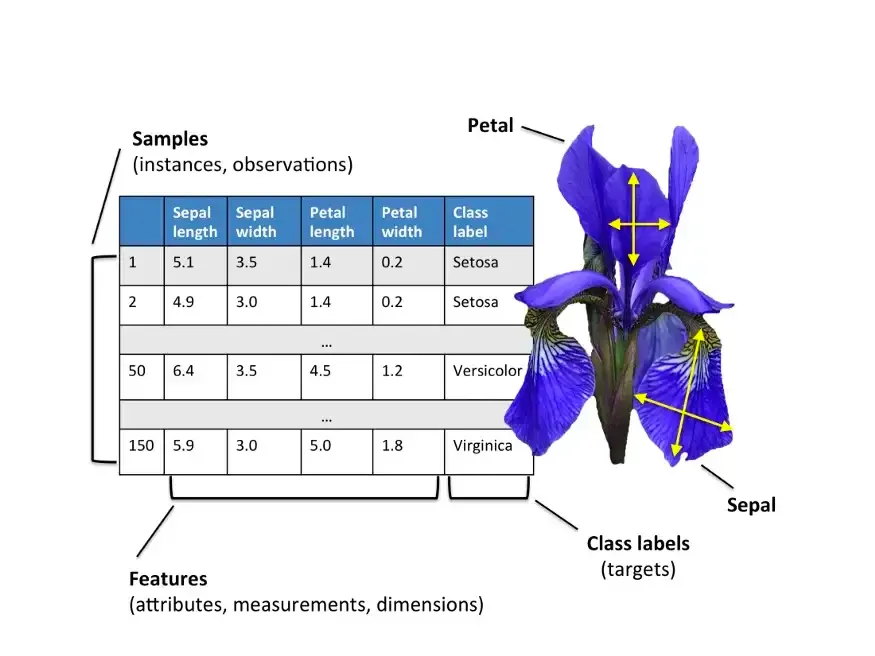

Данните са в `iris.data`, имената на feature-ите са в `iris.feature_names` (съответстват не тези кратки съкращения по-горе), а очакваната цел е в `iris.target`.

In [14]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
type(iris.target)

numpy.ndarray

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris.target.shape

(150,)

Обърнете внимание, че това не са Python масиви, ами NumPy вектори и матрици.

# Синтетични набори от данни

scikit-learn предлага и някои синтетични набори от данни. Понякога и те са интересни.

Любопитен пример е `make_moons`, който прави два полумесеца.

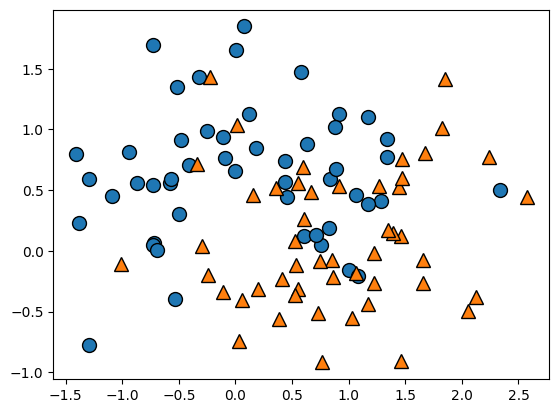

In [22]:
from sklearn.datasets import make_moons
import mglearn

X, y = make_moons(n_samples=100, noise=0.5, random_state=3)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [23]:
X

array([[ 1.82820942,  1.01205551],
       [ 0.20009795, -0.31129087],
       [ 1.00338961, -0.15683063],
       [ 0.5954835 ,  0.68765775],
       [ 1.46909372,  0.75851059],
       [ 1.44113914,  0.52967089],
       [ 2.23983957,  0.77403798],
       [-0.57938723,  0.55842709],
       [-0.72993333,  1.69531767],
       [-0.11321785,  0.93945385],
       [ 1.46663844, -0.90613792],
       [ 0.91061971,  1.12947604],
       [ 0.76542683, -0.91925662],
       [ 0.53392114, -0.11379741],
       [-0.86765603,  0.56196357],
       [ 0.55205349, -0.3108386 ],
       [ 1.17518408, -0.44132647],
       [ 0.43555883,  0.56766053],
       [ 0.01180886,  1.03353977],
       [-0.530152  , -0.39311373],
       [ 0.8641065 , -0.21313635],
       [ 1.33508487,  0.77017575],
       [ 0.60602763,  0.12545423],
       [ 1.28982586,  0.41018477],
       [ 1.02620362, -0.55320369],
       [ 1.46420188,  0.12205083],
       [ 0.11755795,  1.12980654],
       [ 0.85364282, -0.07704759],
       [-1.40890994,

In [24]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

Впрочем, ето невронна мрежа, която разпознава граница между двата класа:

In [26]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X, y)

In [27]:
type(mlp)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

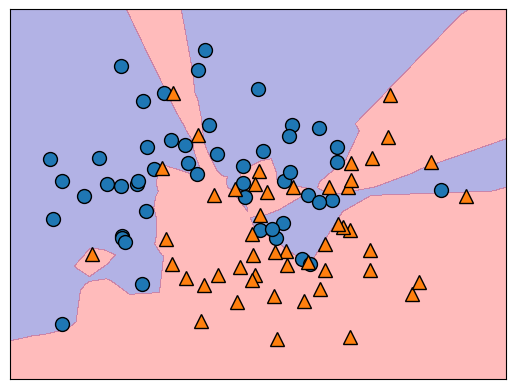

In [28]:
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Горният код има няколко проблема, в които ще навлезем по-натам. Засега просто искаме да ви покажем малко графики, не да разберем как работят невронните мрежи (което е дълъг и сложен въпрос).

# Повече за sklearn.datasets

Повече информация за наборите от данни в scikit-learn може да намерите в документацията:

http://scikit-learn.org/stable/datasets/index.html

# Supervised vs. unsupervised learning

Алгоритмите могат да се разделят на два видя:

* Обучение с учител (Supervised learning) – алгоритми, които разполагат с етикирани данни и генерализират (да отговарят на въпроси за нови данни),
* Обучение без учител (Unsupervised learning) – алгоритми, при които данните нямат етикети и трябва да се открият статистически зависимости в данните.

# Supervised learning ("обучение с учител")

Примери за supervised learning са:

* Регресия - предвиждане на непрекъснати числови стойности: При набор от данни с цени и параметри на апартаменти да определим колко би струвал друг апартамент с определени апартаменти
* Класификация - предвиждане на булеви или цели числени стойности: При набор от данни за тумори да определим дали един е доброкачествен или злокачествен

# Unsupervised learning ("обучение без учител")

Тези алгоритми са по-разнородни и приложими в определени сфери. Например:

* Клъстеризация: При набор от потребители и техните филмови рейтинги да създадем групи от видове предпочитания
* Намаляне на размерността: При набор от многомерни данни данни да сведем броя измерения до по-малък такъв запазвайки повечето информация

# Регресия vs. Класификация

Бихме могли да разделим supervised learning на два вида:

* Регресия – опитваме се да сведем данните до непрекъсната стойност (например цена на апартамент)
* Класификация – опитваме се да определим данните дали попадат в една от две категории (например доброкачествен или злокачествен тумор)

Стандартен подход за класификация с 3+ класа е one-vs-many – създаваме по един класификатор за всяка категория, прекарваме данните през тях и избираме най-вероятната.

# Няколко алгоритъма

Сега ще разгледаме накратко няколко алгоритъма. Целта е да разберем как работят концептуално. Ще разгледаме всеки от тях в детайли в следващи лекции.

# Disclaimer

Ще гледаме набори от данни с едно или две измерения. Те са доста лесни за визуализация, но рядко реалистични – обикновено работим със десетки, стотици или дори хиляди характеристики (т.е. измерения). Това е далеч по-трудно за визуализация, откъдето идва и голяма част от предизвикателството.

# К най-близки съседи (k-Nearest Neighbours, kNN)

Възможно най-простият алгоритъм за класификация.

Запазва цялото множество от данни. За да класифицира нов елемент намира най-близкия (линейно, в евклидово пространство) до него и отговаря със същия клас.

Броят съседи определя колко "гладка" е границата между двата класа. Ето един пример с различен брой съседи:

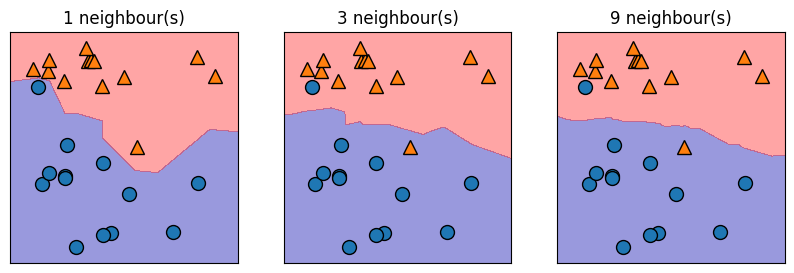

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbour(s)".format(n_neighbors))

Фонът в горната диаграма определя в кой от двата класа ще попадне дадена точка. Обърнете внимание, че при k=1 границата е начупена и хваща всеки елемент. При по-голямо k границата става по-плавна, макар и да класифицира някои елементи грешно. Това може да е предимство (ще игнорира аномалии в данните). Ще видим вариации на тази тема по-натам с нормализация в линейните модели.

# Линейна регресия (Linear Regression)

Най-популярният модел за регресия. Опитва се да намери линейна функция, който приближава данните. С обработка на фийчърите може да намира и нелинейни функци, но с това ще се занимаем по-натам. 

w[0]: 0.393906  b: -0.031804


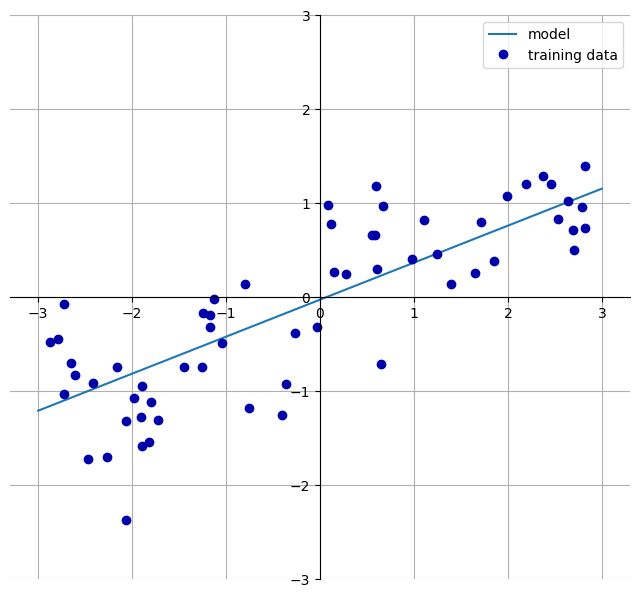

In [31]:
mglearn.plots.plot_linear_regression_wave()

Алгоритъмът се опитва да намери линейна функция, която минимизира общата грешката (сумата от квадратите на дистанцията между резултата от линейната функция и y координата на всеки елемент от набора от данни). В горния случай е трудно да се направи по-точен линеен модел, тъй като данните имат голяма вариация за едни и същи входни стойности. При наличието на повече измерения обикновено може да се постигне по-добър резултат.

# Principal Component Analysis (PCA)
### Обучение без учител, намаляване на размерността (dimensionality reduction) 

С PCA многомерно пространство до такова с по-малко измерения, които запазват (почти напълно) същата информация.

Може да се ползва за избор на характеристики (feature selection) – за да се намали броят на характеристики, с които се тренира модел, което е полезно при големи данни.

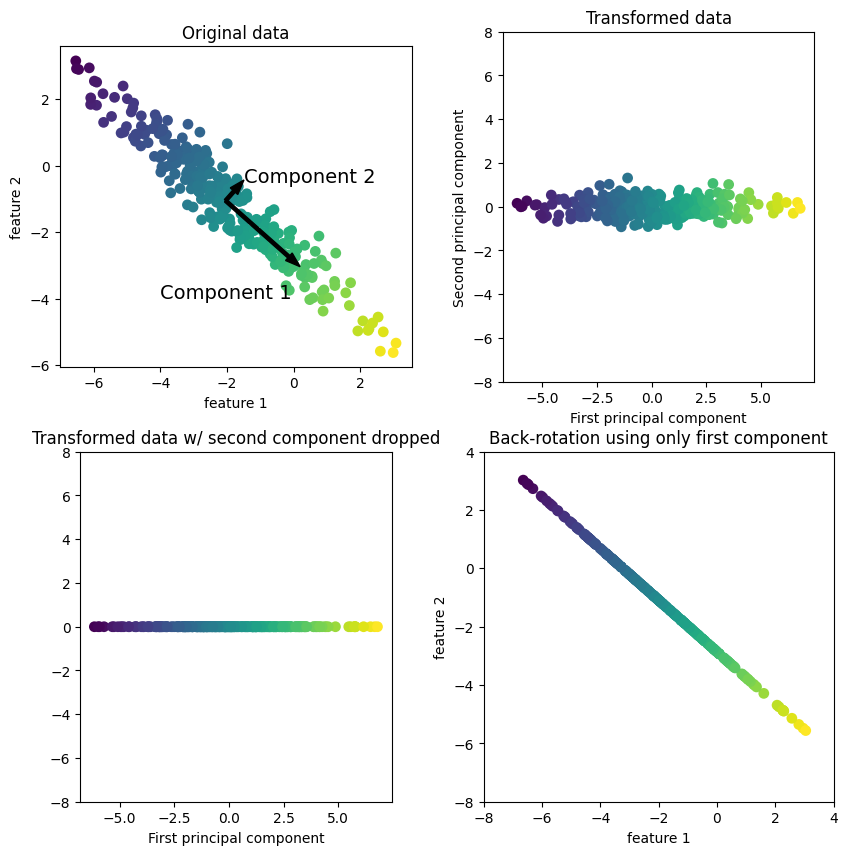

In [32]:
mglearn.plots.plot_pca_illustration()

Графиките горе илюстрират как PCA се опитва да сведе двуизмерно пространство до едноизмерно. Данните могат да се представят чрез базис от два вектора (component_1 и component_2), където component_1 съдържа много информация, а component_2 – малко. С тези данни бихме могли да тренираме относително точен модел само с component_1. Обърнете внимание, че той е функция на оригиналните двe характеристики.

При две измерения това не е нужно, но при 1000+ подобна трансформация на данните може да е задължителна, за да има шанс да съберете модела в паметта.

# k-Means Clustering
### Обучение без учител, клъстеризация

Опитва се да раздели данните на определен брой клъстери.

<IPython.core.display.Javascript object>


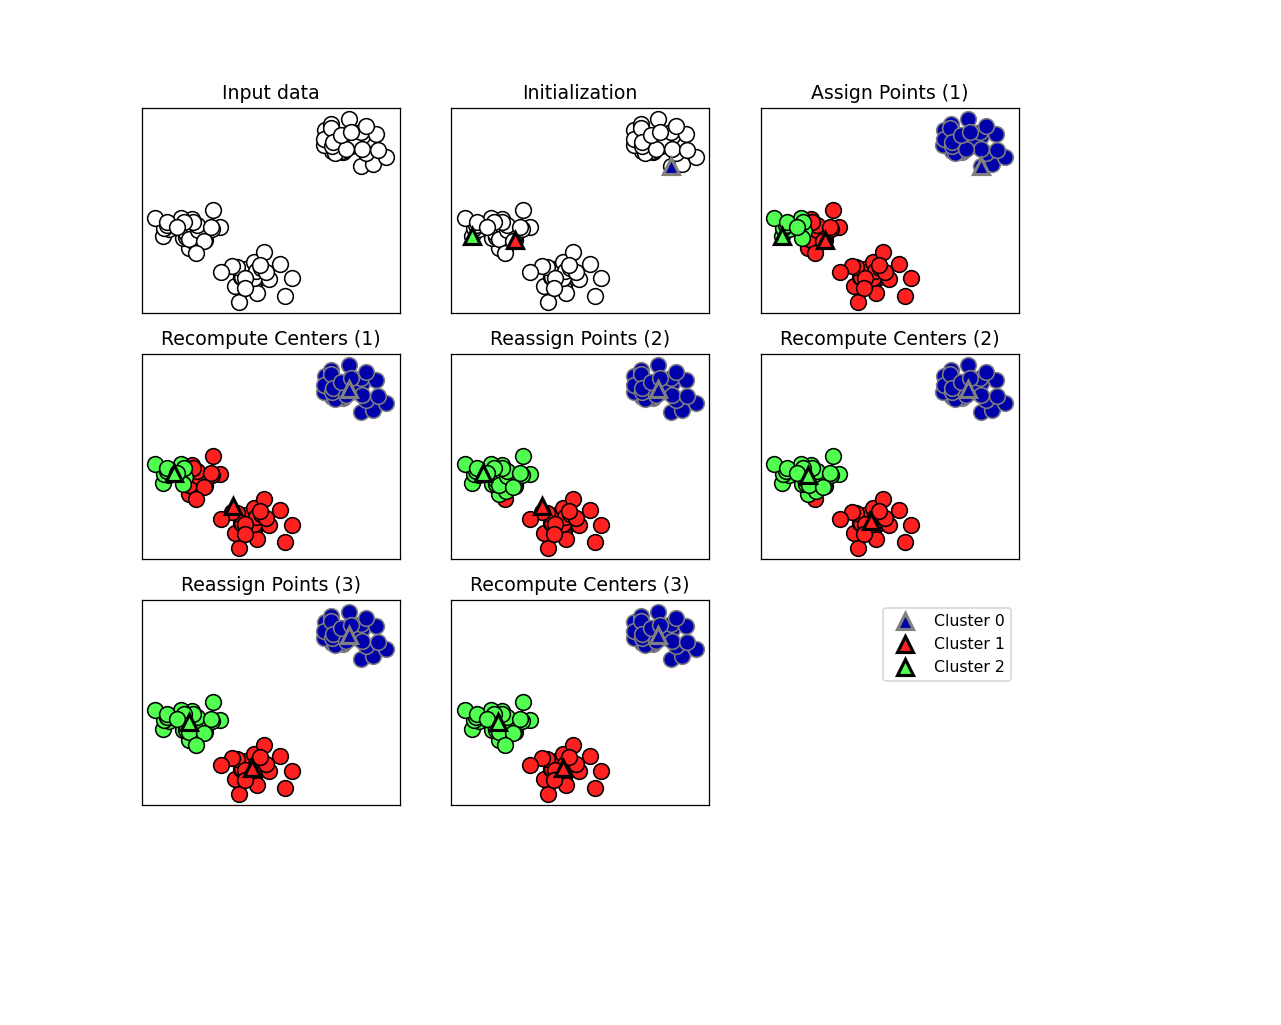

In [17]:
 mglearn.plots.plot_kmeans_algorithm()

Алгоритъмът работи по следния начин:

1. Избира три произволни точки.
2. За всяка точка оцветява данните, за които тя е най-близка.
3. Преизчислява центъра на всеки клъстер от точки от един цвят и мести точката там.
4. Връща се на стъпка 2 и повтаря докато се стабилизира.

Този алгоритъм е недетерминистичен – различен избор на първоначални точки може да произведе различни резултати. По тази причина на практика се изпълнява няколко пъти и се взема добър резултат.

Това също е мотив, който се среща често.

# Задачи

Настройте всички необходими библиотеки и пуснете кода в този файл.

Разгледайте някои от другите примерни данни в scikitlearn. Обучете някой от простите алгоритми върху тях.

# Ресурси

* [Introduction to Machine Learning](http://shop.oreilly.com/product/0636920030515.do)
* [Machine Learning course by Andrew Ng](https://www.coursera.org/learn/machine-learning)